In [1]:
import numpy as np
import tensorflow as tf

import matplotlib.patches as mpatches

import matplotlib.pyplot as plt

%matplotlib inline

plt.rcParams['figure.figsize'] = (10, 6)

In [2]:
# 通过生成随机数来定义一个线性关系
# 义了 Y=3X+2 的线性关系。为了模仿实际数据，我们在Y值上加入了高斯噪声

x_data = np.random.rand(100).astype(np.float32)
y_data = x_data * 3 + 2
y_data = np.vectorize(lambda y: y + np.random.normal(loc=0.0, scale=0.1))(y_data)

In [3]:
# 通过TensorFlow来线性拟合以上的数据
# a、b分别代表线性拟合Y=AX+B中的的A和B。其后的1.0和0.2位初始值

a = tf.Variable(1.0)
b = tf.Variable(0.2)
y = a * x_data + b

In [4]:
# 定义损失函数
# 使用均方误差作为损失值

loss = tf.reduce_mean(tf.square(y - y_data))

In [5]:
# 选择训练的优化器，并定义学习率
# 通过优化器，使得损失函数一步一步减小，最后得到拟合效果

optimizer = tf.train.GradientDescentOptimizer(0.5)
train = optimizer.minimize(loss)

In [6]:
# TensorFlow是基于数据流图(data flow graphs)技术来进行数值计算
# 在每个计算开始时，需要打开一个会话
# 会话是在TensorFlow中创建图形的上下文
# 会话开始时，需要初始化变量

init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [8]:
# 训练模型
# 结果输出了在每10次迭代后，a、b的拟合值，它们慢慢的接近最开始定义的值

train_data = []
for step in range(100):
    evals = sess.run([train,a,b])[1:]
    if step % 10 == 0:
        print(step, evals)
        train_data.append(evals)

0 [3.0067091, 1.9997404]
10 [3.0071883, 1.9994631]
20 [3.0074379, 1.9993187]
30 [3.0075684, 1.9992433]
40 [3.0076361, 1.999204]
50 [3.0076714, 1.9991837]
60 [3.0076897, 1.999173]
70 [3.0076993, 1.9991674]
80 [3.0077043, 1.9991645]
90 [3.0077069, 1.999163]


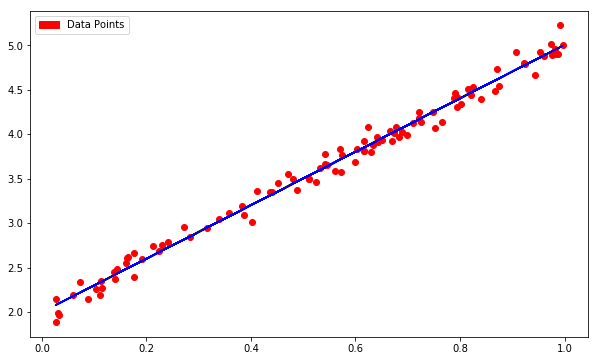

[3.0077083, 1.9991622]


In [9]:
# 绘制拟合过程图

converter = plt.colors
for f in train_data:
    [a, b] = f
    f_y = np.vectorize(lambda x: a*x + b)(x_data)
    line = plt.plot(x_data, f_y)
    plt.setp(line, color=(1,1,0))
plt.plot(x_data, y_data, 'ro')
fy = x_data*evals[0]+evals[1]
line = plt.plot(x_data, f_y)
plt.setp(line, color=(0,0,1))
f_line = mpatches.Patch(color='red', label='Data Points')
plt.legend(handles=[f_line])
plt.show()
print(evals)